<a href="https://colab.research.google.com/github/harishahamed26/Image-Recognition-Cat-Dog/blob/main/ImageClassificiationAnimals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition

## Data loading and EDA


In [8]:
# Importing of necessary libraries

from numpy import matrix
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
from skimage.feature import hog
from sklearn                import tree
from sklearn.decomposition import PCA


from tqdm import tqdm

# defining the constant dimension 

Const_Dim = (200, 200)
RANDOM_SEED = 100

In [3]:
# Loading of data set

df_train_CSV = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/train.csv')


print('Printing 5 rows of the train dataset ')
print('\n')
print(df_train_CSV.head(5))


Printing 5 rows of the train dataset 


   id label
0   1   cat
1   2   dog
2   3   cat
3   4   cat
4   5   cat


In [4]:
# Importing of warnings package to ignore unncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Definition of function for plotting
def plotGraph(data):
  sns.countplot(data)
  plt.title('Count plot')
  plt.show()


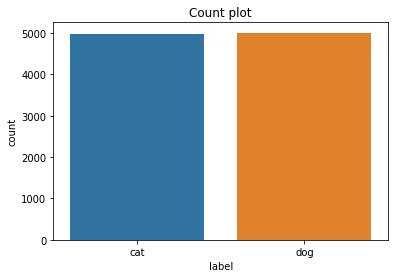

In [5]:
# Plotting of count plot for the train dataset
plotGraph(df_train_CSV['label'] )

In [11]:
#Definition of function to Load the image dataset 
from google.colab.patches import cv2_imshow
import os
def LoadImage(ids, dataset_name , dim):

  images = []
  for id in tqdm(ids, desc = 'loading percentage') :
    #print(f'id is. {id}')
    img_name =  f'{id}.jpg'
    url = f"curl -o {img_name} https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/{dataset_name}/{img_name}"
    os.system(url)
    img = cv2.imread(img_name)
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images


In [20]:
# Loading of train images

train_images = LoadImage(df_train_CSV['id']x, 'train_images', Const_Dim)
print(f'Number of training images loaded: {len(train_images)}')


loading percentage: 100%|██████████| 10000/10000 [31:39<00:00,  5.26it/s]

Number of training images loaded: 10000


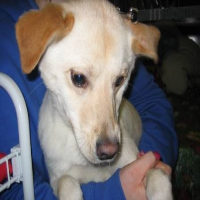

In [62]:
# Displaying a sample of train image 

cv2_imshow(train_images[1])

In [68]:
Testing_img =  train_images[1]

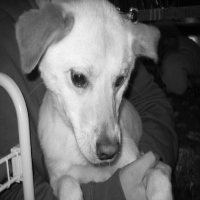

In [69]:
# Converting BGR to GRAY 

cv2_imshow(cv2.cvtColor(Testing_img, cv2.COLOR_BGR2GRAY))

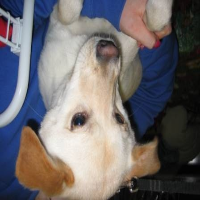

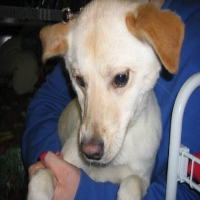

In [70]:
# Flipping 
cv2_imshow(cv2.flip(Testing_img, 0))
cv2_imshow(cv2.flip(Testing_img, 1))

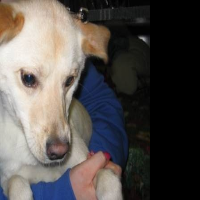

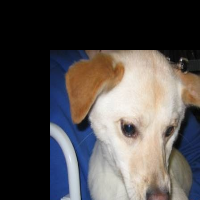

In [71]:
# Translation

m_right = np.float32([[1,0,50],[0,1,50]])
m_left = np.float32([[1,0,-50],[0,1,0]])

cv2_imshow(cv2.warpAffine(Testing_img, m_left, Const_Dim))
cv2_imshow(cv2.warpAffine(Testing_img, m_right, Const_Dim))


## Pre-processing & Image Manipulation 



In [67]:
'''
Defining the function to plot confusion matrix, Accuracy and 
Classification Report
'''

# Function to show the Classification Report 
def ClassificationAndAccuracyReport(ACC, CR):
  print("Classification Report")
  print("\n")
  print(CR)
  print("\n")
  print("Model Accuracy")
  print("\n")
  print(ACC)


# Functio to plot the Confusion matrix

def plot_confusion_matrix(value):
  print("\n")
  
  plt.figure(figsize= (8,8))
  sns.heatmap(value , annot = True, cmap= 'rocket_r')
  plt.title('Confusion Matrix')
  plt.show()



# Function to Check the accuracy score and print classification report
def ReportAndScore(actuals, predictions):
  Accuracy        = accuracy_score(actuals, predictions)
  ConfusionMatrix = confusion_matrix(actuals, predictions)
  return Accuracy, ConfusionMatrix


In [22]:
# Definition of SVM algorithm
def SVM_Algoritham(X_train, X_test, Y_train, Y_test):
  SVM_model = svm.SVC()
  SVM_model.fit(X_train, Y_train)

  # making predictions on the testing set 
  Y_predict = SVM_model.predict(X_test)

  ACC, CM =ReportAndScore(Y_test, Y_predict)
  plot_confusion_matrix(CM)

  CR      = classification_report(Y_test, Y_predict)
  ClassificationAndAccuracyReport(ACC, CR)
  return SVM_model
  


In [23]:
# Method to implement PCA
def Method_PCA(value):
  pca = PCA(n_components= min(value.shape))
  pca.fit(value)
  value = pca.transform(value)

  print(f'Shape of transformed data: {value.shape}')
  return value


## Feature Extraction


1. Image Vectorisation
2. Canny Edge detection
3. HOG - Histogram of Oriented Gradient
4. PCA - Principle Component Analysis

### Model 1

Applying Image Vectorisation in SVM Algorithm

In [130]:

# Method to Get the feature - Image Vectorisation

def M1_Features(f_value):
  
  Features_List = []
  for G_img in f_value:
    Gray = cv2.cvtColor(G_img, cv2.COLOR_BGR2GRAY)
    features = G_img.flatten()
    Features_List.append(features)
  Features_List = np.array(Features_List)
  return Features_List

In [131]:

Features_Train_M1 = M1_Features(train_images)
print(f'Shape of the Feature is {Features_Train_M1.shape}')

Shape of the Feature is (4000, 120000)


In [ ]:
Features_Train_M1 = Method_PCA(Features_Train_M1)

In [28]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M1, df_train_CSV['label'][0:500], test_size=0.3, random_state=RANDOM_SEED)


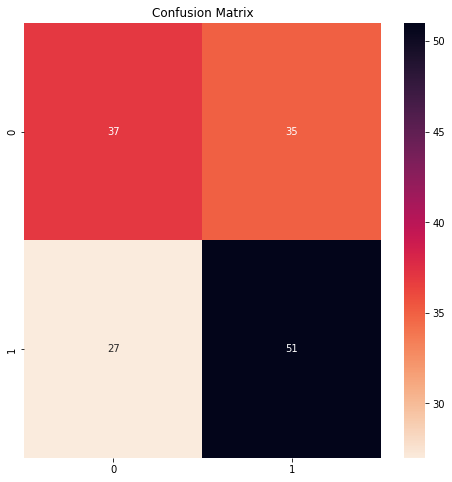

Classification Report


              precision    recall  f1-score   support

         cat       0.58      0.51      0.54        72
         dog       0.59      0.65      0.62        78

    accuracy                           0.59       150
   macro avg       0.59      0.58      0.58       150
weighted avg       0.59      0.59      0.58       150



Model Accuracy


0.5866666666666667


In [29]:
# Implementation of SVM Algorithm
m1_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

### Model 2


Applying Image Vectorisation & Canny Edge Detection in SVM Algorithm


In [39]:
# Canny Edge Detection
m_right = np.float32([[1,0,50],[0,1,50]])
m_left = np.float32([[1,0,-50],[0,1,0]])

def M2_Features(images):
  features_list = []

  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Flipping, Resizing and Hog implementation
    img_vflipped = cv2.flip(img_grayscaled, 0)
    img_hflipped = cv2.flip(img_grayscaled, 1)

    
    img_v_resized = cv2.resize(img_vflipped, (50, 100))

    hog_v_features, hog_v_image = hog(img_v_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )


    img_h_resized = cv2.resize(img_hflipped, (50, 100))

    hog_h_features, hog_h_image = hog(img_h_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )


    # Translation, Resizing and Hog implementation
    img_translated_r = cv2.warpAffine(img_grayscaled, m_right, Const_Dim)
    img_translated_l = cv2.warpAffine(img_grayscaled, m_left, Const_Dim)

    img_r_resized = cv2.resize(img_translated_r, (50, 100))
    img_l_resized = cv2.resize(img_translated_l, (50, 100))


    hog_r_features, hog_r_image = hog(img_r_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    
    hog_l_features, hog_l_image = hog(img_l_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    
    
    features = np.hstack((hog_v_features ,hog_h_features, hog_r_features, hog_l_features))
    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [40]:
Features_Train_M2 = M2_Features(train_images)
print(Features_Train_M2.shape)

(10000, 7920)


In [41]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M2, df_train_CSV['label'], 
                                                    test_size=0.3, random_state=RANDOM_SEED)


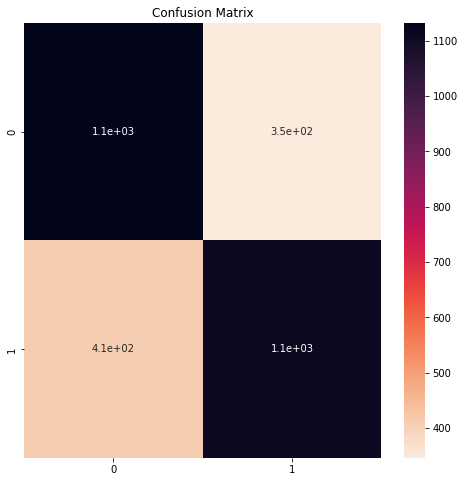

Classification Report


              precision    recall  f1-score   support

         cat       0.73      0.77      0.75      1478
         dog       0.76      0.73      0.75      1522

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



Model Accuracy


0.748


In [42]:
# Implementation of SVM Algorithm
m2_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

### Model 3

Applying Image Vectorisation, Canny Edge Detection and HOG in SVM & DT Algorithm

In [43]:


# method to get image features
def M3_Features(images):
  features_list = []
  
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    img_resized = cv2.resize(img_grayscaled, (50, 100))

    hog_features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    #features = np.hstack((edge_features, hog_features))
    features_list.append(hog_features)
    

  features_list = np.array(features_list)
  return features_list
     

In [44]:
# feature extraction
Features_Train_M3= M3_Features(train_images)
print(Features_Train_M3.shape)

(10000, 1980)


In [45]:
# data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M3, df_train_CSV['label'], 
                                                    test_size=0.3, random_state=RANDOM_SEED)

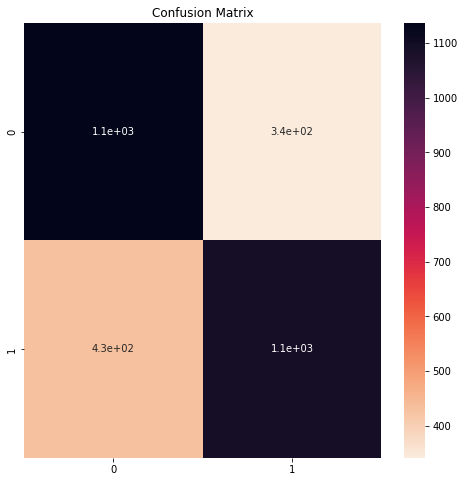

Classification Report


              precision    recall  f1-score   support

         cat       0.73      0.77      0.75      1478
         dog       0.76      0.72      0.74      1522

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000



Model Accuracy


0.743


In [46]:
# Implementation of SVM Algorithm
m3_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

#### Grid Search CV

In [72]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(m3_SVM, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 1.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 1.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 1.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 1.2min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time= 1.2min
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.743 total time= 1.1min
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.724 total time= 1.0min
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.726 total time= 1.0min
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.731 total time= 1.0min
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.751 total time= 1.0min
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.501 total time= 1.1min
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [73]:

grid_predictions = grid.predict(X_test)

  
# print classification report
print(classification_report(Y_test, grid_predictions))
print(accuracy_score(Y_test, grid_predictions))
print(grid.best_score_)

              precision    recall  f1-score   support

         cat       0.72      0.79      0.75      1478
         dog       0.78      0.70      0.74      1522

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000

0.7463333333333333
0.7494285714285714


#### Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
rand_search = RandomizedSearchCV(m3_SVM, param_distributions = rand_list, n_iter = 20, 
                                 n_jobs = 4, cv = 3, random_state = 2017) 
rand_search.fit(X_train, Y_train) 


In [ ]:
rand_search.best_score_

In [76]:

Rand_predictions = rand_search.predict(X_test)

  
# print classification report
print(classification_report(Y_test, Rand_predictions))
print(accuracy_score(Y_test, Rand_predictions))

              precision    recall  f1-score   support

         cat       0.72      0.79      0.76      1478
         dog       0.78      0.70      0.74      1522

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000

0.7473333333333333


### Model 4

In [25]:
def M4_Features(images):
  features_list = []
  for img in images:
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized    = cv2.resize(img_grayscaled, (50, 100))

    hog_features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    #features = np.hstack((lbp_img, hog_features))
    features_list.append(hog_features)
    
  features_list = np.array(features_list)
  return features_list

In [27]:
# feature extraction

Features_Train_M4= M4_Features(train_images)
Features_Train_M41= M4_Features1(train_images)
print(Features_Train_M4.shape)
print(Features_Train_M41.shape)

(10000, 1980)
(10000, 5000)


In [28]:
Features_Train_M4_ = np.hstack((Features_Train_M4, Features_Train_M41))

In [26]:

from skimage.feature import  local_binary_pattern

def M4_Features1(images):
  features_list = []
  for img in images:
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized    = cv2.resize(img_grayscaled, (50, 100))

    lbp_img        = local_binary_pattern(img_resized, 8,1,
                                          method= 'uniform').ravel()

    features_list.append(lbp_img)
    
  features_list = np.array(features_list)
  return features_list

In [ ]:
Features_Train_M4 = Method_PCA(Features_Train_M4)

In [32]:
# data split for train and validation

X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M41, df_train_CSV['label'], 
                                                    test_size=0.3, random_state=RANDOM_SEED)

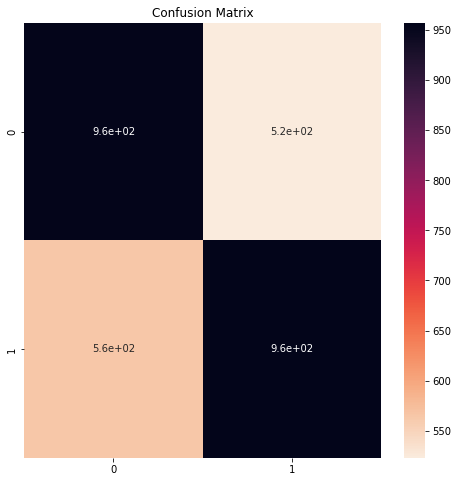

Classification Report


              precision    recall  f1-score   support

         cat       0.63      0.65      0.64      1478
         dog       0.65      0.63      0.64      1522

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



Model Accuracy


0.6373333333333333


In [33]:
# Implementation of SVM Algorithm
m4_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

# Prediciton of Test dataset

In [47]:
# Prediciton

df_test_CSV  = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/test.csv')

print('\n')
print('Printing 5 rows of the test dataset ')
print('\n')
print(df_test_CSV.head(5))



Printing 5 rows of the test dataset 


   id
0   1
1   2
2   3
3   4
4   5


In [55]:
df_test_predic = df_test_CSV.copy()

In [48]:
# Loading of test images

test_images = LoadImage(df_test_CSV['id'], 'test_images' , Const_Dim)
print(f'Number of training images loaded: {len(test_images)}')


loading percentage: 100%|██████████| 1000/1000 [03:28<00:00,  4.79it/s]

Number of training images loaded: 1000


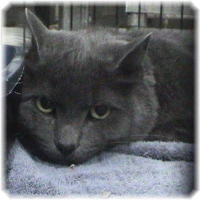

In [50]:
# Displaying a sample of test image 

cv2_imshow(test_images[1])

In [51]:
predict_Test = M3_Features(test_images)
print(predict_Test.shape)

(1000, 1980)


In [56]:
df_test_predic['prediction'] = m3_SVM.predict(predict_Test)
df_test_predic['prediction'][0:10]

0    dog
1    cat
2    cat
3    cat
4    dog
5    dog
6    dog
7    cat
8    cat
9    dog
Name: prediction, dtype: object

In [57]:
df_test_predic.head(5)

,id,prediction
0,1,dog
1,2,cat
2,3,cat
3,4,cat
4,5,dog


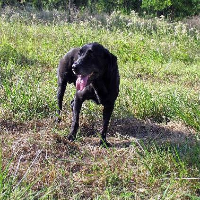

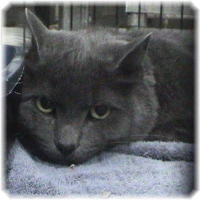

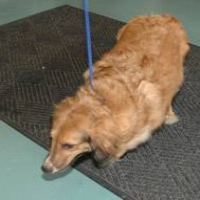

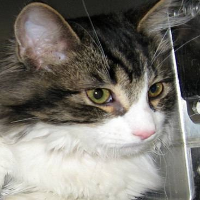

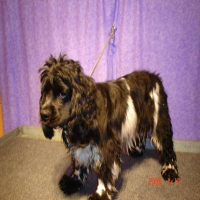

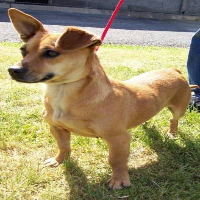

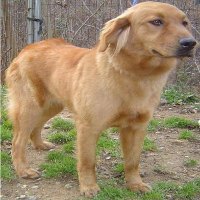

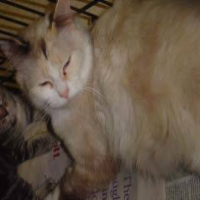

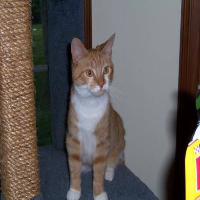

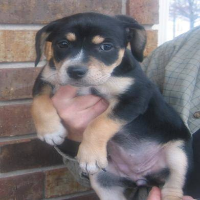

In [54]:
for i in range(0,10):
  cv2_imshow(test_images[i])


In [60]:

import json

import pandas as pd


data = []
for index, row in df_test_predic.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "/content/sample_data/submission_m3.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 'dog'}, {'id': 2, 'prediction': 'cat'}, {'id': 3, 'prediction': 'cat'}, {'id': 4, 'prediction': 'cat'}, {'id': 5, 'prediction': 'dog'}]
